<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>
<a target="_blank" href="https://colab.research.google.com/github/CienciaDeDatosEspacial/GDF_OPS_applications/blob/main/gasandschools.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Moving

# Getting ready

## Installations needed

In [77]:
!pip install osmnx mapclassify

## Data needed

### Official data preprocessing

In [78]:
import geopandas as gpd #cargarlo en geopandas, lo que tienes es una capa de polígonos

filez="https://github.com/Lulo-Vilcarano-MF/Tarea-Individual-2/raw/refs/heads/main/2020_Census_Tracts_Seattle_8661193084158732132.zip"
seattle=gpd.read_file(filez)
seattle.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GEOID20     177 non-null    object  
 1   GROSS_ACRE  177 non-null    float64 
 2   LAND_ACRES  177 non-null    float64 
 3   WATER_ACRE  177 non-null    float64 
 4   NAME        177 non-null    object  
 5   TRACT_NUMB  177 non-null    int64   
 6   BASENAME    177 non-null    object  
 7   UVDA_AREA   177 non-null    object  
 8   CRA_NO      177 non-null    float64 
 9   CRA_GRP     177 non-null    int32   
 10  GEN_ALIAS   177 non-null    object  
 11  DETL_NAMES  177 non-null    object  
 12  C_DISTRICT  177 non-null    int64   
 13  geometry    177 non-null    geometry
dtypes: float64(4), geometry(1), int32(1), int64(2), object(6)
memory usage: 18.8+ KB


As you see, it is just one geometry:

In [79]:
seattle
#muestra el contenido del GeoDataFrame  en pantalla (una tabla con sus atributos y geometrías).

,GEOID20,GROSS_ACRE,LAND_ACRES,WATER_ACRE,NAME,TRACT_NUMB,BASENAME,UVDA_AREA,CRA_NO,CRA_GRP,GEN_ALIAS,DETL_NAMES,C_DISTRICT,geometry
0,53033000402,444.493643,444.527261,0.000000,Census Tract 4.02,402,4.02,Bitter Lake Village,9.1,9,Broadview/Bitter Lake,"Broadview, Bitter Lake",5,"POLYGON ((1267598.433 267477.138, 1267788.924 ..."
1,53033000403,180.930716,165.408389,15.535762,Census Tract 4.03,403,4.03,Bitter Lake Village,9.1,9,Broadview/Bitter Lake,"Broadview, Bitter Lake",5,"POLYGON ((1265848.993 271492.767, 1265842.812 ..."
2,53033000700,319.838996,319.862596,0.000000,Census Tract 7,700,7,Lake City,8.2,8,Olympic Hills/Victory Heights,"Lake City, Victory Heights, Olympic Hills, Pin...",5,"POLYGON ((1277629.018 265876.292, 1277833.975 ..."
3,53033003302,154.942826,154.952619,0.000000,Census Tract 33.02,3302,33.02,Ballard,10.2,10,Whittier Heights,"Whittier Heights, Loyal Heights, Crown Hill",6,"POLYGON ((1262877.612 251639.607, 1262891.039 ..."
4,53033003601,166.571397,166.583375,0.000000,Census Tract 36.01,3601,36.01,Green Lake - Roosevelt,9.4,9,Green Lake,"Green Lake, Meridian, Roosevelt, Woodland Park",6,"POLYGON ((1274839.167 250046.877, 1274833.189 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,53033008101,68.690415,66.798515,68.613998,Census Tract 81.01,8101,81.01,Center City,13.2,13,Downtown Commercial Core,"Downtown Commercial Core, West Edge, Central B...",7,"POLYGON ((1268688.847 226501.062, 1268841.791 ..."
173,53033010401,402.739919,402.750637,0.000000,Census Tract 104.01,10401,104.01,Othello,3.5,3,Beacon Hill,Beacon Hill,2,"POLYGON ((1279994.827 207985.661, 1280136.282 ..."
174,53033011401,304.713408,304.719237,0.000000,Census Tract 114.01,11401,114.01,Westwood-Highland Park,2.4,2,Roxhill/Westwood,"Roxhill, Westwood, South Delridge, White Center",1,"POLYGON ((1264535.644 198387.214, 1264519.606 ..."
175,53033011700,868.762098,868.775078,0.000000,Census Tract 117,11700,117,Rainier Beach,3.4,3,South Beacon Hill/NewHolly,"South Beacon Hill, NewHolly, Holly Park",2,"POLYGON ((1280795.738 197846.082, 1280877.933 ..."


The map we have has come projected:

In [80]:
seattle.crs
#ver el sistema de coordenadas del conjunto de datos geográficos (el Coordinate Reference System o CRS).

<Projected CRS: PROJCS["NAD83(HARN) / Washington North (ftUS)",GEO ...>
Name: NAD83(HARN) / Washington North (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Crowdsourced data pre processing

In [81]:
# Obtener las estaciones de gasolina en seattle,
#consulta datos de OpenStreetMap (OSM) y extrae las estaciones de combustible (servicios-amenuty/fuel-gasolineras) dentro del área de Boston.
import osmnx as ox

stations = ox.features_from_place("seattle, WA, USA", #stations será un GeoDataFrame con la ubicación (geometría)
                                tags={'amenity': 'fuel'})        #y los atributos (nombre, operador, etc.) de todas las estaciones de gasolina en Boston.

Notice we are getting several gas stations, already as a GDF:

In [82]:
stations.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 129 entries, ('node', np.int64(457773031)) to ('way', np.int64(1106778201))
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   geometry                   129 non-null    geometry
 1   amenity                    129 non-null    object  
 2   brand                      112 non-null    object  
 3   brand:wikidata             110 non-null    object  
 4   name                       120 non-null    object  
 5   addr:city                  42 non-null     object  
 6   addr:housenumber           46 non-null     object  
 7   addr:postcode              43 non-null     object  
 8   addr:street                46 non-null     object  
 9   check_date                 47 non-null     object  
 10  compressed_air             49 non-null     object  
 11  website                    33 non-null     object  
 12  source                     79 

In [83]:
stations.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [84]:
stations.index #consulta los índices (las etiquetas de las filas) del GeoDataFrame llamado stations.

MultiIndex([('node',  457773031),
            ('node',  631386821),
            ('node',  678256779),
            ('node',  771801423),
            ('node', 1197964284),
            ('node', 1489962206),
            ('node', 1731281907),
            ('node', 2702032640),
            ('node', 2702054487),
            ('node', 2995124967),
            ...
            ( 'way',  600101678),
            ( 'way',  600101691),
            ( 'way',  600101760),
            ( 'way',  603557992),
            ( 'way',  616232144),
            ( 'way',  616232166),
            ( 'way',  616232167),
            ( 'way',  727276570),
            ( 'way',  940949039),
            ( 'way', 1106778201)],
           names=['element', 'id'], length=129)

In [85]:
stations.reset_index(drop=False,inplace=True) #guarda como una nueva columna
stations.head()

,element,id,geometry,amenity,brand,brand:wikidata,name,addr:city,addr:housenumber,addr:postcode,...,contact:facebook,contact:instagram,contact:phone,contact:twitter,contact:youtube,covered,shop,landuse,contact:website,mapwithai:source
0,node,457773031,POINT (-122.39997 47.63939),fuel,Chevron,Q319642,Magnolia Chevron,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,631386821,POINT (-122.3203 47.62518),fuel,76,Q1658320,76,Seattle,915,98102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,678256779,POINT (-122.29762 47.57811),fuel,Arco,Q304769,Arco,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,771801423,POINT (-122.35525 47.73205),fuel,Chevron,Q319642,Chevron,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,1197964284,POINT (-122.32958 47.58001),fuel,Shell,Q110716465,Shell,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
colsToKeep=['element','name','geometry'] #hace una lista con solo las columnas relevantes
fuelSeattle=stations[colsToKeep].copy() #crea nuevo GeoDataFrame llamado , que solo incluye esas tres columnas.

- Reproject the data:

In [87]:
Seattle_crs = "EPSG:26986" #define una variable llamada Seattle_crs con el valor "EPSG:26986"

fuelSeattle = fuelSeattle.to_crs(Seattle_crs) #Convierte (reproyecta) las geometrías de fuelSeattle al sistema de coordenadas EPSG:26986.

- Review:

In [88]:
fuelSeattle.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   element   129 non-null    object  
 1   name      120 non-null    object  
 2   geometry  129 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 3.2+ KB


In [89]:
fuelSeattle.fillna({'name':'Unknown'},inplace=True) #Si en la columna name hay valores faltantes, reemplaza con el texto 'Unknown'

In [90]:
fuelSeattle.index.astype(str)+"_"+fuelSeattle.name

,0
0,0_Magnolia Chevron
1,1_76
2,2_Arco
3,3_Chevron
4,4_Shell
...,...
124,124_Unknown
125,125_Unknown
126,126_Shree's
127,127_7-Eleven


Then,

In [91]:
fuelSeattle['newname']=fuelSeattle.index.astype(str)+"_"+fuelSeattle.name #Combina: el índice de cada fila (fuelBoston.index) convertido a texto (.astype(str)),+ un guion bajo "_",
                                                          # + y el valor de la columna 'name'.
fuelSeattle.set_index('newname',inplace=True) #Usa la nueva columna newname como índice del GeoDataFrame
fuelSeattle.drop(columns=['name'],inplace=True) #Quita la columna 'name', porque ya está incluida dentro del índice
fuelSeattle.head()

,element,geometry
newname,,
0_Magnolia Chevron,node,POINT (-3418433.356 2601533.031)
1_76,node,POINT (-3414347.628 2596842.39)
2_Arco,node,POINT (-3415878.252 2591529.61)
3_Chevron,node,POINT (-3409828.147 2608202.203)
4_Shell,node,POINT (-3417759.099 2593059.87)


In [92]:
import pandas as pd

pd.crosstab(fuelSeattle.element,fuelSeattle.geometry.geom_type, margins=True) #construye una tabla o forma de contar cuántas veces se combinan dos variables categóricas.


col_0,Point,Polygon,All
element,,,
node,15,0,15
way,0,114,114
All,15,114,129


In [109]:
#original data
stations[stations.element=='way'] #como no hay relation: usamos node solo como referencia

,element,id,geometry,amenity,brand,brand:wikidata,name,addr:city,addr:housenumber,addr:postcode,...,contact:facebook,contact:instagram,contact:phone,contact:twitter,contact:youtube,covered,shop,landuse,contact:website,mapwithai:source
15,way,34618474,"POLYGON ((-122.34485 47.69085, -122.34485 47.6...",fuel,Arco,Q304769,Arco,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,way,34618510,"POLYGON ((-122.34415 47.69005, -122.34415 47.6...",fuel,76,Q1658320,76,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,way,35965166,"POLYGON ((-122.34417 47.70536, -122.34417 47.7...",fuel,Arco,Q304769,Arco,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,way,92190405,"POLYGON ((-122.34462 47.7193, -122.34473 47.71...",fuel,76,Q1658320,76,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,way,136051471,"POLYGON ((-122.38465 47.58105, -122.38465 47.5...",fuel,Safeway,Q1508234,Safeway,Seattle,4115,98116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,way,616232166,"POLYGON ((-122.29764 47.57818, -122.29764 47.5...",fuel,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,way,616232167,"POLYGON ((-122.29757 47.57809, -122.29749 47.5...",fuel,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,way,727276570,"POLYGON ((-122.33603 47.53219, -122.33603 47.5...",fuel,Shell,Q110716465,Shree's,Seattle,140,98106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,way,940949039,"POLYGON ((-122.26383 47.68144, -122.26394 47.6...",fuel,7-Eleven,Q259340,7-Eleven,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MapWithAI


<Axes: >

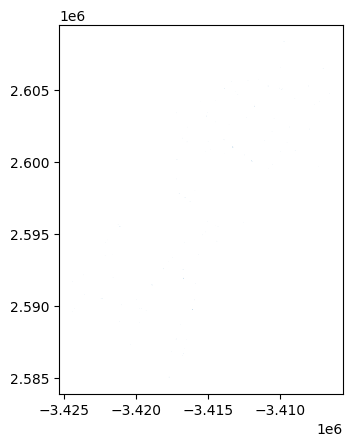

In [110]:
fuelSeattle[fuelSeattle.element=='way'].plot()

Centros educativos de Seattle:

In [111]:
# Get schools in Seattle
schools = ox.features_from_place("Seattle, WA, USA",
                                tags={'amenity': 'school'})
schools.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 210 entries, ('node', np.int64(356540545)) to ('way', np.int64(1442890189))
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   geometry                 210 non-null    geometry
 1   amenity                  210 non-null    object  
 2   check_date               20 non-null     object  
 3   ele                      139 non-null    object  
 4   gnis:feature_id          145 non-null    object  
 5   name                     210 non-null    object  
 6   addr:city                146 non-null    object  
 7   addr:housenumber         156 non-null    object  
 8   addr:postcode            145 non-null    object  
 9   addr:street              156 non-null    object  
 10  religion                 24 non-null     object  
 11  addr:state               105 non-null    object  
 12  old_name                 11 non-null     object  
 13  web

Let's reformat this as we did before:

In [112]:
schools.reset_index(inplace=True)
schoolSeattle=schools[['element','name','geometry']].copy()
schoolSeattle.fillna({'name':'Unknown'},inplace=True)
schoolSeattle['newname']=schoolSeattle.index.astype(str)+"_"+schoolSeattle.name
schoolSeattle.set_index('newname',inplace=True)
schoolSeattle.drop(columns=['name'],inplace=True)
schoolSeattle = schoolSeattle.to_crs(Seattle_crs)
schoolSeattle.head() #basicamente lo mismo de las gasolineras, cambiar y agregar columnas

,element,geometry
newname,,
0_Mapleleaf School,node,POINT (-3407964.905 2602797.259)
1_Hazel Wolf K-8,node,POINT (-3411201.026 2601737.039)
2_Epic Life Academy,node,POINT (-3410651.7 2605152.512)
3_Christ the King Elementary School,node,POINT (-3410862.072 2606402.301)
4_Assumption Saint Bridget School,node,POINT (-3409548.844 2600245.575)


See element vs geo:

In [115]:
pd.crosstab(schoolSeattle.element,schoolSeattle.geometry.geom_type, margins=True)

col_0,MultiPolygon,Point,Polygon,All
element,,,,
node,0,54,0,54
relation,4,0,2,6
way,0,0,150,150
All,4,54,152,210


In [116]:
#original data
schools[(schools.element=='relation') & (schools.geometry.geom_type=='MultiPolygon')]

,element,id,geometry,amenity,check_date,ele,gnis:feature_id,name,addr:city,addr:housenumber,...,access:disabled,not:name,school,school:type,building:levels,fax,name:etymology,addr:housename,layer,type
54,relation,537423,"MULTIPOLYGON (((-122.2931 47.57649, -122.29298...",school,NaN,28,1505026,Franklin High School,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon
56,relation,4764405,"MULTIPOLYGON (((-122.31777 47.64223, -122.3176...",school,NaN,62,1515690,Seattle Preparatory School,Seattle,2400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon
57,relation,7616973,"MULTIPOLYGON (((-122.33765 47.69496, -122.3376...",school,NaN,NaN,NaN,Cascadia Elementary School,Seattle,1700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon
59,relation,18609000,"MULTIPOLYGON (((-122.26364 47.67391, -122.2636...",school,NaN,NaN,NaN,Sand Point Elementary School,Seattle,6208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon


<Axes: >

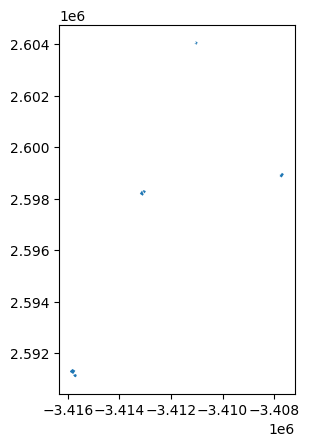

In [119]:
schoolSeattle[(schoolSeattle.element=='relation') & (schoolSeattle.geometry.geom_type=='MultiPolygon')].plot()

In [120]:
base=seattle.explore(tiles='cartodbpositron',color='lightblue')
schoolSeattle.explore(m=base,color='k')
fuelSeattle.explore(m=base,color='red')

# **Proximidad**

In [121]:
D_Matrix_fuel_fuel=fuelSeattle.geometry.apply\
(lambda station: fuelSeattle.geometry.distance(station))

D_Matrix_fuel_fuel

newname,0_Magnolia Chevron,1_76,2_Arco,3_Chevron,4_Shell,5_7-Eleven,6_Unknown,7_Morrison's North Star Marine,8_Shilshole Fuel Dock,9_Dr. Dan's Biodiesel,...,119_Chevron,120_76,121_Chevron,122_Safeway Fuel Station,123_Shell,124_Unknown,125_Unknown,126_Shree's,127_7-Eleven,128_Unknown
newname,,,,,,,,,,,,,,,,,,,,,
0_Magnolia Chevron,0.000000,6220.554099,10324.582097,10887.033167,8499.945887,6126.887639,1428.541426,4175.363863,4630.333278,3703.378442,...,11088.484563,8099.731946,8513.979323,11397.902346,8429.969169,10315.202317,10324.315629,12902.287965,11285.835470,9752.517231
1_76,6220.554099,0.000000,5528.872812,12225.836684,5093.681033,4466.978042,5408.955375,2928.317828,9070.258407,5805.722146,...,10555.085449,9330.267750,5857.488234,6615.286305,3508.144189,5516.870368,5532.504505,10441.672657,7582.455939,5450.222289
2_Arco,10324.582097,5528.872812,0.000000,17736.378954,2424.723390,9954.027706,9027.306267,8315.199170,14161.611195,11136.349795,...,15841.352200,14857.625726,10932.719869,1114.145129,2050.427971,7.099370,3.953940,5874.123785,11810.286283,886.653611
3_Chevron,10887.033167,12225.836684,17736.378954,0.000000,17093.573647,7784.779563,11963.529742,9729.863650,7018.213672,7536.285098,...,3452.365972,2976.865976,7474.264475,18799.679014,15733.945171,17724.274167,17739.821503,22362.130865,8908.975534,17666.650353
4_Shell,8499.945887,5093.681033,2424.723390,17093.573647,0.000000,9474.494849,7117.037069,7378.902867,12697.804582,9982.541386,...,15635.493525,14129.426502,10933.703996,3221.677608,2174.238589,2421.814140,2418.041271,5351.430728,12359.205243,1535.715486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124_Unknown,10315.202317,5516.870368,7.099370,17724.274167,2421.814140,9941.908106,9018.423945,8303.557115,14150.798491,11124.934054,...,15829.239100,14845.589559,10920.675376,1117.412540,2038.882557,0.000000,9.786180,5879.401613,11797.292942,886.148203
125_Unknown,10324.315629,5532.504505,3.953940,17739.821503,2418.041271,9957.427498,9026.367212,8319.152598,14163.668178,11139.712236,...,15844.240342,14861.206847,10935.424725,1098.156446,2054.141891,9.786180,0.000000,5856.831967,11812.061773,877.972657
126_Shree's,12902.287965,10441.672657,5874.123785,22362.130865,5351.430728,14816.454563,11476.689553,12633.504605,17428.671560,15064.206986,...,20986.797812,19382.235254,16262.641734,5419.730331,7200.624100,5879.401613,5856.831967,0.000000,17513.321484,5330.018750


Calculo de la distancia mínima entre esas gasolineras

In [122]:
D_Matrix_fuel_fuel.replace(0,None,inplace=True) # evitar the zero
D_Matrix_fuel_fuel.min(axis=1).sort_values().head(10)

,0
newname,
103_ARCO,3.595886
102_ARCO,3.595886
125_Unknown,3.95394
2_Arco,3.95394
88_76,4.489809
87_76,4.489809
124_Unknown,7.09937
89_Shell,10.573901
90_Shell,10.573901


Distancia gasolinera-centros educativos

In [123]:
D_Matrix_fuel_school=fuelSeattle.geometry.apply\
(lambda station: schoolSeattle.geometry.distance(station))

D_Matrix_fuel_school

newname,0_Mapleleaf School,1_Hazel Wolf K-8,2_Epic Life Academy,3_Christ the King Elementary School,4_Assumption Saint Bridget School,5_Saint Edward Parish School,6_Learning Way School,7_Concordia Lutheran School,8_Northwest Montessori School,9_Northwest Childrens Academy,...,200_Lincoln High School,201_Rainier Valley Leadership Academy,202_Eckstein Middle School,203_La Escuelita Bilingual School,204_Seattle Classical Christian School,205_Little Laurels,206_Cascade Parent Partnership Program,207_Roxhill Elementary School,208_Downtown School,209_Seattle Waldorf School - Main Campus
newname,,,,,,,,,,,,,,,,,,,,,
0_Magnolia Chevron,10544.512155,7235.207545,8582.237895,9001.896399,8977.309995,13407.409505,13573.676255,9553.974110,4510.128207,5351.230746,...,5002.620582,13828.769241,9099.128932,7231.725034,8138.423237,12291.934940,3140.386432,13646.598544,4074.842915,10334.365088
1_76,8729.239043,5818.822543,9094.944283,10175.510352,5883.026249,8851.691507,12034.017838,6632.635515,5099.553962,884.491157,...,4054.327916,9239.733299,6434.624996,6120.218400,2649.945883,10933.792248,3691.989322,12458.872952,2567.273194,8655.341756
2_Arco,13768.839820,11228.002421,14591.103003,15695.827417,10771.696415,3330.412312,7954.269222,11475.215546,10575.121187,6163.255386,...,9581.762718,3728.238240,11419.267575,11550.146430,2866.241704,15967.825380,8861.703479,8591.029438,6289.911890,13745.647569
3_Chevron,5717.088197,6609.323266,3158.933380,2075.728667,7961.528850,21033.975581,23591.186559,7602.271452,7503.685263,11713.637088,...,8057.910867,21407.608555,7081.931718,6229.754631,14833.972200,5008.888107,9525.111048,23843.683230,12489.895589,5474.742200
4_Shell,13810.972485,10876.652858,14026.656537,15019.635369,10910.666228,4954.069047,6998.894859,11653.694770,9653.235822,5415.123351,...,8880.125442,5373.910254,11494.604532,11161.861451,3133.622020,16019.499209,7687.314235,7486.057220,4803.805714,13743.804263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124_Unknown,13756.614033,11215.848097,14578.980131,15683.750926,10759.391908,3334.946554,7958.877055,11462.799663,10563.358485,6151.522413,...,9569.789922,3732.462208,11407.064290,11537.994296,2854.107630,15955.519102,8850.443047,8595.328656,6279.741323,13733.471600
125_Unknown,13771.403195,11231.196584,14594.491954,15699.335467,10774.200983,3314.222683,7938.000547,11477.631623,10578.992339,6167.148297,...,9585.433355,3712.429806,11421.847188,11553.378188,2869.589458,15970.328657,8864.698475,8575.276331,6290.845028,13748.246692
126_Shree's,19140.832592,16225.844783,19333.495328,20286.511009,16210.670896,4655.798653,2223.106569,16946.775458,14871.905502,10751.516707,...,14186.176000,4785.473393,16811.626325,16507.392707,8228.101017,21351.845206,12818.369759,2971.327877,9871.050212,19080.575156


### Rehubicación: Encontrar las estaciones que deben desaparecer.

In [124]:
D_Matrix_fuel_school.min(axis=1).sort_values().head(10)

,0
newname,
101_Shell,0.828757
37_Shell,23.376028
68_Shell,36.827289
1_76,75.444304
111_Chevron,91.671685
73_Shell,95.097816
109_Shell,97.540781
95_Chevron,100.495328
35_Chevron,112.617874


estaciones estan al menos 200 metros de algun centro educativo:

In [125]:
mindDist=200 #distancia minima

### Perímetro **seguro**

In [126]:
schoolSeattle_buffered=schoolSeattle.buffer(mindDist)
schoolSeattle_buffered

,0
newname,
0_Mapleleaf School,"POLYGON ((-3407764.905 2602797.259, -3407765.8..."
1_Hazel Wolf K-8,"POLYGON ((-3411001.026 2601737.039, -3411001.9..."
2_Epic Life Academy,"POLYGON ((-3410451.7 2605152.512, -3410452.664..."
3_Christ the King Elementary School,"POLYGON ((-3410662.072 2606402.301, -3410663.0..."
4_Assumption Saint Bridget School,"POLYGON ((-3409348.844 2600245.575, -3409349.8..."
...,...
205_Little Laurels,"POLYGON ((-3406629.125 2604602.802, -3406617.2..."
206_Cascade Parent Partnership Program,"POLYGON ((-3415331.219 2600670.87, -3415245.75..."
207_Roxhill Elementary School,"POLYGON ((-3424086.667 2588854.312, -3424093.4..."


In [127]:
type(schoolSeattle_buffered)

geopandas.geoseries.GeoSeries

Turning GS into GDF:

In [128]:
secured_schoolSeattle=gpd.GeoDataFrame(geometry=schoolSeattle_buffered)
secured_schoolSeattle

,geometry
newname,
0_Mapleleaf School,"POLYGON ((-3407764.905 2602797.259, -3407765.8..."
1_Hazel Wolf K-8,"POLYGON ((-3411001.026 2601737.039, -3411001.9..."
2_Epic Life Academy,"POLYGON ((-3410451.7 2605152.512, -3410452.664..."
3_Christ the King Elementary School,"POLYGON ((-3410662.072 2606402.301, -3410663.0..."
4_Assumption Saint Bridget School,"POLYGON ((-3409348.844 2600245.575, -3409349.8..."
...,...
205_Little Laurels,"POLYGON ((-3406629.125 2604602.802, -3406617.2..."
206_Cascade Parent Partnership Program,"POLYGON ((-3415331.219 2600670.87, -3415245.75..."
207_Roxhill Elementary School,"POLYGON ((-3424086.667 2588854.312, -3424093.4..."


Creación de Poligonos

In [129]:
secured_schoolSeattle.geometry.geom_type.value_counts()

,count
Polygon,210


Geometrías estandarizadas

In [131]:
fuelSeattle.geometry.geom_type.value_counts()

,count
Polygon,114
Point,15


In [133]:
fuelSeattle_allPoly=fuelSeattle.copy() #se crea un búfer de 10 metros ya que no son puntos
fuelSeattle_allPoly['geometry'] = [
    station.buffer(10) if station.geom_type == 'Point' else station
    for station in fuelSeattle.geometry
]

In [137]:
#Revision
fuelSeattle_allPoly.geometry.geom_type.value_counts()

,count
Polygon,129


# Reubicacion final

In [138]:
fuelSeattle_allPoly.overlay(secured_schoolSeattle,how='intersection',keep_geom_type=False)

,element,geometry
0,node,"POLYGON ((-3414337.676 2596841.41, -3414337.82..."
1,node,"POLYGON ((-3414337.676 2596841.41, -3414337.82..."
2,node,"POLYGON ((-3415868.3 2591528.63, -3415868.444 ..."
3,node,"POLYGON ((-3417749.147 2593058.89, -3417749.29..."
4,node,"POLYGON ((-3417093.34 2588071.53, -3417093.484..."
5,node,"POLYGON ((-3423265.952 2589055.057, -3423266.6..."
6,way,"POLYGON ((-3410821.239 2605250.071, -3410824.7..."
7,way,"POLYGON ((-3421146.076 2595479.866, -3421153.1..."
8,way,"POLYGON ((-3414365.01 2594480.265, -3414371.51..."
9,way,"POLYGON ((-3414365.01 2594480.265, -3414371.51..."


In [139]:
fuelSeattle_allPoly.sjoin(secured_schoolSeattle,how='inner',predicate='intersects')

,element,geometry,newname_right
newname_left,,,
1_76,node,"POLYGON ((-3414337.628 2596842.39, -3414337.67...",147_Lowell Elementary School
1_76,node,"POLYGON ((-3414337.628 2596842.39, -3414337.67...",41_St. Nicholas School
2_Arco,node,"POLYGON ((-3415868.252 2591529.61, -3415868.3 ...",54_Franklin High School
4_Shell,node,"POLYGON ((-3417749.099 2593059.87, -3417749.14...",18_Career Link School
13_Chevron,node,"POLYGON ((-3417093.292 2588072.51, -3417093.34...",163_Aki Kurose Middle School
14_Gas & Smoke Depot,node,"POLYGON ((-3423263.682 2589061.401, -3423263.7...",6_Learning Way School
17_Arco,way,"POLYGON ((-3410811.122 2605265.495, -3410821.2...",2_Epic Life Academy
19_Safeway,way,"POLYGON ((-3421137.097 2595493.222, -3421146.0...",98_Lafayette Elementary School
23_Arco,way,"POLYGON ((-3414359.502 2594488.58, -3414365.01...",76_Garfield High School


In [140]:
gas_relocate=fuelSeattle_allPoly.sjoin(secured_schoolSeattle,how='inner',predicate='intersects')

In [141]:
is_duplicate = gas_relocate.index.duplicated(keep=False)

gas_relocate[is_duplicate]

,element,geometry,newname_right
newname_left,,,
1_76,node,"POLYGON ((-3414337.628 2596842.39, -3414337.67...",147_Lowell Elementary School
1_76,node,"POLYGON ((-3414337.628 2596842.39, -3414337.67...",41_St. Nicholas School
23_Arco,way,"POLYGON ((-3414359.502 2594488.58, -3414365.01...",76_Garfield High School
23_Arco,way,"POLYGON ((-3414359.502 2594488.58, -3414365.01...",181_Nova High School
68_Shell,way,"POLYGON ((-3414288.508 2595503.292, -3414292.0...",192_Seattle World School
68_Shell,way,"POLYGON ((-3414288.508 2595503.292, -3414292.0...",51_The Hatch School
68_Shell,way,"POLYGON ((-3414288.508 2595503.292, -3414292.0...",112_Morningside Academy
71_7-Eleven,way,"POLYGON ((-3414476.716 2595567.099, -3414469.1...",192_Seattle World School
71_7-Eleven,way,"POLYGON ((-3414476.716 2595567.099, -3414469.1...",112_Morningside Academy


In [145]:
gas_relocate.reset_index(drop=False).\
drop_duplicates(subset='newname_left').\
set_index('newname_left')
#modificaciones en las columnas

,element,geometry,newname_right
newname_left,,,
1_76,node,"POLYGON ((-3414337.628 2596842.39, -3414337.67...",147_Lowell Elementary School
2_Arco,node,"POLYGON ((-3415868.252 2591529.61, -3415868.3 ...",54_Franklin High School
4_Shell,node,"POLYGON ((-3417749.099 2593059.87, -3417749.14...",18_Career Link School
13_Chevron,node,"POLYGON ((-3417093.292 2588072.51, -3417093.34...",163_Aki Kurose Middle School
14_Gas & Smoke Depot,node,"POLYGON ((-3423263.682 2589061.401, -3423263.7...",6_Learning Way School
17_Arco,way,"POLYGON ((-3410811.122 2605265.495, -3410821.2...",2_Epic Life Academy
19_Safeway,way,"POLYGON ((-3421137.097 2595493.222, -3421146.0...",98_Lafayette Elementary School
23_Arco,way,"POLYGON ((-3414359.502 2594488.58, -3414365.01...",76_Garfield High School
29_7-Eleven,way,"POLYGON ((-3415533.131 2604181.358, -3415529.5...",134_Adams Elementary School


###cambio efectivo

In [146]:
gas_relocate= gas_relocate.reset_index(drop=False).drop_duplicates(subset='newname_left').\
              set_index('newname_left')

Reubicación de escuelas y gasolineras

In [147]:
base=secured_schoolSeattle.sjoin(gas_relocate,how='inner',predicate='intersects').explore(color='yellow', tiles='cartodbpositron')
gas_relocate.explore(m=base,color='red')

## Exacta reubicación de las gasolineras

In [149]:
# Define the place
place = "Seattle, WA, USA"

# Download the street network graph for Boston
G = ox.graph_from_place(place, network_type="drive")

# Convert the graph edges (streets) to a GeoDataFrame
streets = ox.graph_to_gdfs(G, nodes=False, edges=True)

streets.shape

(50210, 15)

In [150]:
streets.highway.value_counts().index

Index([                   'residential',                       'tertiary',
                            'secondary',                        'primary',
                         'unclassified',                  'motorway_link',
                             'motorway',                 'secondary_link',
                                'trunk',                   'primary_link',
                        'tertiary_link',                  'living_street',
        ['unclassified', 'residential'],                     'trunk_link',
                               'busway', ['living_street', 'residential'],
            ['tertiary', 'residential'],     ['unclassified', 'tertiary'],
              ['tertiary', 'secondary'],        ['secondary', 'tertiary'],
               ['secondary', 'primary'],    ['motorway', 'motorway_link'],
             ['tertiary', 'trunk_link'],     ['motorway_link', 'primary'],
            ['secondary', 'trunk_link'],    ['residential', 'trunk_link'],
          ['trunk_link', 

In [151]:
GAS_STATION_ROAD_TYPES = [
    'motorway',      # High-speed limited access roads
    'primary',       # Major national roads
    'trunk',         # Important regional roads
    'motorway_link', # Motorway entrance/exit ramps
    'primary_link',  # Primary road connectors
    'trunk_link',     # Trunk road connectors
    ['motorway', 'trunk'],
    ['primary', 'motorway_link'],
    ['primary', 'primary_link']
]

suitable_roads = streets[streets.highway.isin(GAS_STATION_ROAD_TYPES)]

suitable_roads.shape

(2427, 15)

In [153]:
suitable_roads = suitable_roads.to_crs(seattle.crs)

Posibles ubicaciones

In [155]:
competitionDistance=100 # a safe value from above 'D_Matrix_fuel_fuel'
fuelSeattle_allPoly_buffered=fuelSeattle_allPoly.buffer(competitionDistance)

GDF

In [156]:
type(fuelSeattle_allPoly_buffered)

geopandas.geoseries.GeoSeries

In [157]:
secured_fuelSeattle_allPoly=gpd.GeoDataFrame(geometry=fuelSeattle_allPoly_buffered)


# Áreas seguras:



In [158]:
secured_areas_dissolved=secured_fuelSeattle_allPoly.overlay(secured_schoolSeattle,how='union',keep_geom_type=False).dissolve()
secured_areas=gpd.GeoDataFrame(geometry=secured_areas_dissolved.geometry)

/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:2763: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["NAD83(HARN) / Washington North (ftUS)",GEO ...
Right CRS: EPSG:26986

  return geopandas.clip(self, mask=mask, keep_geom_type=keep_geom_type, sort=sort)
/tmp/ipython-input-761890122.py:1: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  suitable_roads.clip(secured_areas,keep_geom_type=False).plot()


<Axes: >

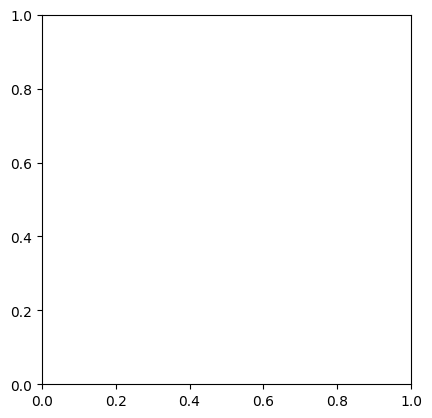

In [159]:
suitable_roads.clip(secured_areas,keep_geom_type=False).plot()

/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:2861: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["NAD83(HARN) / Washington North (ftUS)",GEO ...
Right CRS: EPSG:26986

  return geopandas.overlay(


<Axes: >

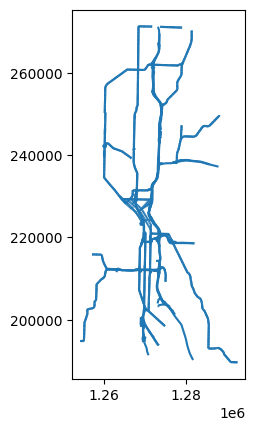

In [160]:
suitable_roads.overlay(secured_areas,keep_geom_type=False, how='difference').plot()

/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:2560: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["NAD83(HARN) / Washington North (ftUS)",GEO ...
Right CRS: EPSG:26986

  return geopandas.sjoin(
/tmp/ipython-input-666423483.py:1: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  suitable_roads.sjoin(secured_areas, predicate='intersects').plot()


<Axes: >

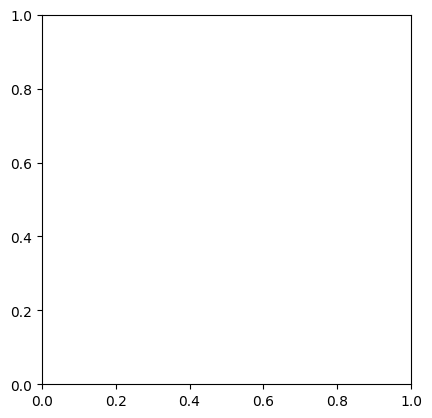

In [161]:
suitable_roads.sjoin(secured_areas, predicate='intersects').plot()

In [162]:
good_routes_forGas_dissolved=suitable_roads.overlay(secured_areas,keep_geom_type=False, how='difference').dissolve()
good_routes_forGas=gpd.GeoDataFrame(geometry=good_routes_forGas_dissolved.geometry)
good_routes_forGas

/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:2861: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["NAD83(HARN) / Washington North (ftUS)",GEO ...
Right CRS: EPSG:26986

  return geopandas.overlay(


,geometry
0,"MULTILINESTRING ((1273281.728 236469.254, 1273..."


<Axes: >

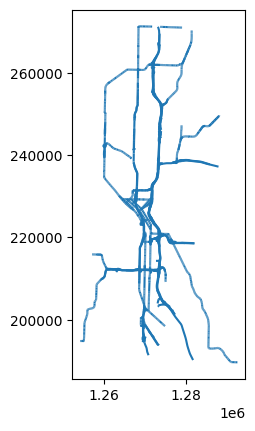

In [163]:
good_routes_forGas.plot()

We may choose a location from those places:

In [184]:
# newCOMPETITORS=safe_fuelCompetitors_gdf.copy()
potential_Locations=good_routes_forGas.copy()
newPOLYGONS=[]
pointsComputed=1
attempts=1
while pointsComputed<=len(gas_relocate):
  candidatePoint=potential_Locations.sample_points(1)
  candidateStation=gpd.GeoDataFrame(geometry=candidatePoint.buffer(100))
  if candidateStation.overlay(secured_areas,how='intersection',keep_geom_type=False).empty:
    newPOLYGONS.append(candidateStation)
    pointsComputed+=1
    potential_Locations=potential_Locations.overlay(candidateStation, how='difference', keep_geom_type=False)
  if attempts>len(gas_relocate)*10:
    break
  attempts+=1

# some info
attempts,len(newPOLYGONS)



/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:2861: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["NAD83(HARN) / Washington North (ftUS)",GEO ...
Right CRS: EPSG:26986

  return geopandas.overlay(
/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:2861: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["NAD83(HARN) / Washington North (ftUS)",GEO ...
Right CRS: EPSG:26986

  return geopandas.overlay(
/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:2861: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left C

(29, 28)

In [185]:
newPOLYGONS

[                                            geometry
 0  POLYGON ((1270239.415 231433.573, 1270238.934 ...,
                                             geometry
 0  POLYGON ((1273643.184 213143.851, 1273642.702 ...,
                                             geometry
 0  POLYGON ((1268852.704 260811.771, 1268852.222 ...,
                                             geometry
 0  POLYGON ((1269131.103 198598.969, 1269130.622 ...,
                                             geometry
 0  POLYGON ((1268095.324 231295.75, 1268094.842 2...,
                                             geometry
 0  POLYGON ((1268842.513 271430.493, 1268842.032 ...,
                                             geometry
 0  POLYGON ((1273629.551 218239.294, 1273629.07 2...,
                                             geometry
 0  POLYGON ((1271062.511 222678.859, 1271062.029 ...,
                                             geometry
 0  POLYGON ((1267802.824 250567.92, 1267802.342 2...,
                   

In [186]:
pd.concat(newPOLYGONS)

,geometry
0,"POLYGON ((1270239.415 231433.573, 1270238.934 ..."
0,"POLYGON ((1273643.184 213143.851, 1273642.702 ..."
0,"POLYGON ((1268852.704 260811.771, 1268852.222 ..."
0,"POLYGON ((1269131.103 198598.969, 1269130.622 ..."
0,"POLYGON ((1268095.324 231295.75, 1268094.842 2..."
0,"POLYGON ((1268842.513 271430.493, 1268842.032 ..."
0,"POLYGON ((1273629.551 218239.294, 1273629.07 2..."
0,"POLYGON ((1271062.511 222678.859, 1271062.029 ..."
0,"POLYGON ((1267802.824 250567.92, 1267802.342 2..."
0,"POLYGON ((1261909.068 232466.513, 1261908.587 ..."


In [187]:
GoodLocationsGas_buffered_gdf=pd.concat(newPOLYGONS)
GoodLocationsGas_gdf=gpd.GeoDataFrame(geometry=GoodLocationsGas_buffered_gdf.centroid)

<Axes: >

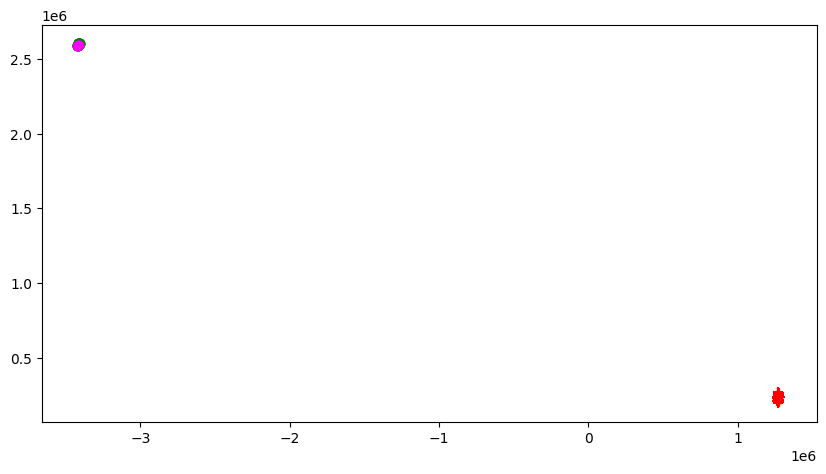

In [188]:
# original suitable roads
base = suitable_roads.plot(color='yellow', figsize=(10, 10),zorder=1)

# non-overlapping buffers
GoodLocationsGas_buffered_gdf.plot(ax=base, edgecolor='red', marker="+", facecolor='none',zorder=2)

# center points of the buffers
GoodLocationsGas_gdf.plot(ax=base, color='red', marker="+", markersize=50,zorder=3)

# all stations
fuelSeattle.plot(ax=base,color='k',zorder=4)
schoolSeattle.plot(ax=base,color='green',zorder=5)

# stations to relocate
fuelSeattle.clip(gas_relocate).plot(ax=base,color='magenta',zorder=5)


In [175]:
from geopy.geocoders import Nominatim
import time

# Initialize geocoder
geolocator = Nominatim(user_agent="seattle_gas_stations")

def get_address(point):
  # Now coordinates are in degrees (lon, lat)
  lon = point.x
  lat = point.y
  location = geolocator.reverse((lat, lon), exactly_one=True, timeout=10)
  time.sleep(1)  # Rate limiting

  if location:
    return location.address
  else:
    return None # not found

In [176]:
# Get addresses
GoodLocationsGas_4326 = GoodLocationsGas_gdf.to_crs('EPSG:4326')
GoodLocationsGas_gdf['address'] = GoodLocationsGas_4326.geometry.apply(get_address)

In [177]:
GoodLocationsGas_gdf

,geometry,address
0,POINT (1272930.283 264411.564),"I 5, Pinehurst, Haller Lake, Seattle, King Cou..."
0,POINT (1269727.155 221185.818),"561, Alaskan Way South, Yesler Terrace, Seattl..."
0,POINT (1273531.878 217728.254),"I 5, Yesler Terrace, Seattle, King County, Was..."
0,POINT (1271470.584 228252.397),"I 5, Central Business District, First Hill, Se..."
0,POINT (1284472.181 202125.859),"6433, Rainier Avenue South, Brighton, Rainier ..."
0,POINT (1270104.582 219806.138),"1055, 1st Avenue South, Yesler Terrace, Seattl..."
0,POINT (1260139.197 241671.198),"3457, 15th Avenue West, Queen Anne, Seattle, K..."
0,POINT (1267696.409 230418.493),"State Route 99 Tunnel, South Lake Union, Casca..."
0,POINT (1276863.218 271204.323),"MKG Fitness, 1557, Northeast 145th Street, Sea..."
0,POINT (1269115.069 200474.92),"Highland Park Way Southwest, Georgetown, Seatt..."


______

[BACK TO MAIN MENU](https://cienciadedatosespacial.github.io/GDF_OPS_applications/)